# Simple Liear Regression



we will discuss the simplest example with reall data and only consider x and y, 2 dimension. 

### Example

in Human Language, it is easily to speak in real case;
Let's say you have collect a data of the grade of students get and hours they put in study.

| hours(x) | 1.1 | 2.5 | 2.7 | 3.2 | 5.5 | 7.7 | 8.9 | 9.2 |
|----------|-----|-----|-----|-----|-----|-----|-----|-----|
| grade(y) | 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |

You <b>assume</b> grade $Y$ and $X$ has a relation that greater x the greater y. So you formulate like for every $y$ equals weight multiply every $x$ and plus b, we call it <b>prediction function</b>.

$$\begin{align}
& y(x;w,b) = wx+b 
\end{align}$$

our goal is to find w, b that makes the prediction function close enough to really data $y_i$

$$\begin{align}
& y(1.1;w,b) = 1.1w + b \\
\end{align}$$

We use distance ( or Mean Square Error,or other method. Distance is easily, every thing should be easily in human language ) to tell how close the prediction to the real data $y$

$$\begin{align}
&\sqrt{(y_1 - y(1.1;w,b))^2} = \sqrt{(17 - (1.1w +b))^2}
\end{align}$$

Because we don't like square root and square root function is a incresing function, we only need to find the smallest number under the square root.

$$\begin{align}
&f_1(w,b;1.1) = (17 - (1.1w +b))^2
\end{align}$$

you mind notice we have change the $y(1.1;w,b)$ to $f(w,b;1.1)$, because w,b now is unkown, x is known as 1.1;

$$\begin{align}
&f_2(w,b;2.5) = (21 - (2.5w +b))^2 \\
&f_3(w,b;2.7) = (30 - (2.7w +b))^2 \\
&f_4(w,b;3.2) = (27 - (3.2w +b))^2 \\
&f_5(w,b;5.5) = (60 - (5.5w +b))^2 \\
&f_6(w,b;7.7) = (85 - (7.7w +b))^2 \\
&f_7(w,b;8.9) = (88 - (8.9w +b))^2 \\
&f_8(w,b;9.2) = (95 - (9.2w +b))^2 \\
\end{align}$$

Add all the function together, and divided by the total amount, we noted as <b>loss function </b>

$$\begin{align}
&loss(w,b;x_i) = \frac {1}{8}\sum_{i=1}^{n=8} f(w,b;x_i) \rightarrow \\
&loss(w,b;x_i) = \\
&(17 - (1.1w +b))^2 + (21 - (2.5w +b))^2 + (30 - (2.7w +b))^2 + \\
&(27 - (3.2w +b))^2 +(60 - (5.5w +b))^2 + (85 - (7.7w +b))^2 + \\
&(88 - (8.9w +b))^2 +(95 - (9.2w +b))^2
\end{align}$$

we know that the derivative of a function equals 0 is the optimal point.

$$\begin{align}
& \frac {d(loss(w,b;x_i))}{dw} = 0  
& \frac {d(loss(w,b;,x_i))}{db} = 0
\end{align}$$

we know come to a optimal problems, we use step linear search to find the optimal w and b;

$$\begin{align}
& {df_1/dw} = 2.2(17+b-1.1w), \quad {df_1/db} = 2(17+b-1.1w) \\
& {df_2/dw} = 5(21+b-2.5w), \quad {df_2/db} = 2(21+b-2.5w) \\
& ... \\
& {df_8/dw} = 18.4(95+b-9.2w), \quad {df_8/db} = 2(95+b-9.2w) \\
\end{align}$$


In [6]:
def c():
    return 2.2*17 + 5*21 + 5.4*50 + 6.4*27 + 11*60 + 15.4*85 + 17.8*88 + 18.4*95
def b():
    return 2.2 + 5 + 5.4 + 6.4 + 11 + 15.4 + 17.8 + 18.4
def cof():
    return 2.2 * 1.1 + 5*2.5 + 5.4*2.7 + 6.4*3.2 + 11*5.5 + 15.4*7.7 + 17.8*8.9 + 18.4*9.2

def cb():
    return 2*17 + 2*21 + 2*50 + 2*27 + 2*60 + 2*85 + 2*88 + 2*95
def bb():
    return 2*8
def cofb():
    return 2 * 1.1 + 2*2.5 + 2*2.7 + 2*3.2 + 2*5.5 + 2*7.7 + 2*8.9 + 2*9.2

print('dloss/dw = %.1f + %.1fb - %.2fw = 0'%(c(),b(),cof()))
print('dloss/db = %.1f + %.1fb - %.1fw = 0'%(cb(),bb(),cofb()))


dloss/dw = 5868.6 + 81.6b - 556.76w = 0
dloss/db = 886.0 + 16.0b - 81.6w = 0


that is a lot of work you see, you now know how important to make it into a model to salve people from doing this chores?
$$\begin{align}
& \frac {d(loss(w,b;x_i))}{dw} = 5868.6 + 81.6b - 556.76w = 0 \rightarrow \\
& w = (5868.6 + 81.6b)/556.76 \\
& \frac {d(loss(w,b;,x_i))}{db} = 886.0 + 16.0b - 81.6w = 0 \rightarrow \\
& b = 81.6( (5868.6 + 81.6b)/556.76 ) - 886.0 \rightarrow \\
& b = 556.76*(81.6*5868.6/556.76 - 886.0) / (556.76-81.6**2)
\end{align}$$

In [10]:
b = 556.76*(81.6*5868.6/556.76 - 886.0) / (556.76-81.6**2)
w = (5868.6 + 81.6*b)/556.76
print('w=%f, b=%f'%(w,b))

w=10.886788, b=2.361860


So this is our predict model

$y(x;w,b) = 10.886788x+2.36186 $

Let's check if this function works 

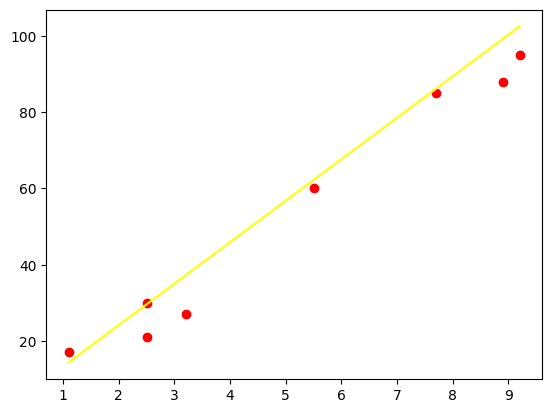

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1.1, 2.5, 2.5, 3.2, 5.5, 7.7, 8.9, 9.2])
#| 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |
Y=np.array([17, 21, 30, 27, 60, 85, 88, 95])

b=2.361860
w=10.886788
def predict(x):
    return w*x+b
plt.scatter(X, Y, color = 'red')
plt.plot(X ,predict(X), color ='yellow')
plt.show()


### Implementation

1. feed the data to our prediction function $ f(x;w,b) = wx+b $
2. add up all the distance between real data and prediction function $ \sum_{i=1}^{n} (y_{true}-f(w,b;x_i))^2 $
3. using <b>nonlinear optimization</b> to find the minimum of w and b

w=10.205028, b=1.109242


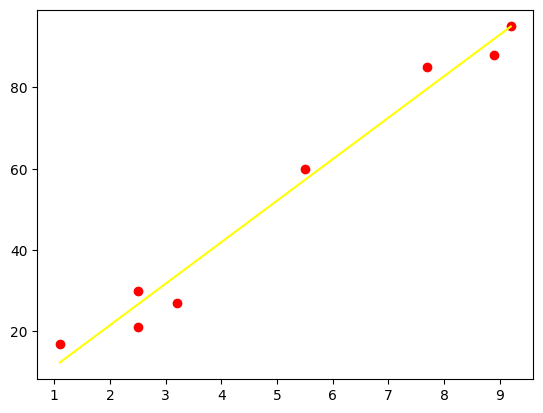

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1.1, 2.5, 2.5, 3.2, 5.5, 7.7, 8.9, 9.2])
#| 17  | 21  | 30  | 27  | 60  | 85  | 88  | 95  |
Y=np.array([17, 21, 30, 27, 60, 85, 88, 95])

#prediction function
def predic(x,w,b):
    return w*x+b

 
def gradient(f,X,h):
    #df has the same length(size) as vector X
    df = np.zeros(X.size)
    #i mean dimention, axis
    for i in range(X.size):
        #difference at point x_i
        #a1, a2 is a vector like X,
        #only differentiate at one axis i, and keep other axis orinal point
        a1 = X.copy()
        a2 = X.copy()
        a1[i] = X[i] - h
        a2[i] = X[i] + h
        df[i] = ( f(a2) - f(a1) )/(2*h)
    return df   

def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
    #while np.linalg.norm(ad.gh(f)[0](x))>precision: # an alternative stopping rule
        f_old = f_new # store value at the current point
        d = -gradient(f,x,0.01) # search direction
        x = x+d*step # take a step
        f_new = f(x) # compute function value at the new point
        steps.append(list(x)) # save step
    return x,f_new,steps

def linear_regression():
    F = []
    for i in range(0, np.size(X)):
        fi = lambda p: (Y[i]-predic(X[i],p[0],p[1]))**2
        F.append(fi)
    loss = lambda p: sum( fi(p) for fi in F)/8
    #print(loss([11,2.5]))
    start = [0.0,0.0]
    step_size = 0.001
    precision = 0.00001
    (x_value,f_value,steps) = steepest_descent(loss,start,step_size,precision)
    return x_value


value = linear_regression()
print('w=%f, b=%f'%(value[0],value[1]))
plt.scatter(X, Y, color = 'red')
plt.plot(X , predic(X,value[0],value[1]), color ='yellow')
plt.show()


### Mathematical Model

dataset
$$\begin{align}
&x_i = (x_1, x_2, ..., x_n), i = 1,2,...,n \\
&y_i = (y_1, y_2, ..., y_n), i = 1,2,...,n \\
\end{align}$$

prediction function
$$\begin{align}
&y(x;\omega,\beta) = \omega{x} + \beta
\end{align}$$

loss function
$$\begin{align}
&loss(\omega,\beta;x) = \sum_{i=1}^{n}(y_i-(\omega{x_i} + \beta))^2, i=1,2,...,n
\end{align}$$

convert to minimization problem
$$\begin{align}
&\min. \quad loss(\omega,\beta;x) \\
&\Delta{loss(\omega,\beta;x)} = 0 \\
& \frac{dloss(\omega,\beta;x)}{d\omega} = 0 \\
& \frac{dloss(\omega,\beta;x)}{d\beta} = 0
\end{align}$$


Optimiztion: Gradient Decent
$$\begin{align}
&\alpha_{i} = h, \quad \lim(h \to 0), \quad i=0 \\  
&\alpha_{i+1} = \alpha_{i} - \gamma{\Delta{loss(\omega,\beta;\alpha_{i})}} \\
&\alpha_{i} =\alpha_{i+1}, \quad i = 1 \\
&\alpha_{i+1} = \alpha_{i} - \gamma{\Delta{loss(\omega,\beta;\alpha_{i})}} \\
&...
\end{align}$$

### Conclusion
In Statistics, It is really important to find relation between data and make it into model. linear regression with one words to sum up is to draw a line between data while keep every point to the line has shortest distance.
